# Project 1 implementation
### In this notebook, we will be implementing and visualising our answers to the different questions


In Mergesort, when the sizes of subarrays are small, the overhead of many recursive
calls makes the algorithm inefficient. Therefore, in real use, we often combine
Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better
efficiency. The idea is to set a small integer **S** as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to **S**,
the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

## (a) Algorithm implementation:
### Implement the above hybrid algorithm.
We will be implementing all 3 different types so that we can have a richer comparison between the different algorithms

In [1]:
# Import relevant libraries that we're going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

In [2]:
# Global variables to track comparisons for each sorting algorithm
comparison_count = 0

In [3]:
# Below are the implementations of the different sorting algorithms

# Insertion sort implementation
def insertion_sort(arr, left, right):
    global comparison_count
    start_time = time.time()
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        # Use a loop that always counts the comparison
        while True:
            comparison_count += 1  # Count the comparison that follows
            if j < left or arr[j] <= key:
                break
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return time.time() - start_time

# Helper function for mergesort and the hybrid approach
def merge(arr, left, mid, right):
    global comparison_count
    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < len(L) and j < len(R):
        comparison_count += 1 
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1

# Normal mergesort implementation
def standard_merge_sort(arr, left, right):
    start_time = time.time()
    global comparison_count
    if left < right:
        mid = (left + right) // 2
        standard_merge_sort(arr, left, mid)
        standard_merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)
    return time.time()-start_time

        
# Hyrbid mergesort implementation
def hybrid_merge_sort(arr, left, right, S):
    start_time = time.time()
    if left < right:
        if (right-left + 1) <= S:
            insertion_sort(arr, left, right)
        else:
            mid = (left + right) // 2
            hybrid_merge_sort(arr, left, mid, S)
            hybrid_merge_sort(arr, mid + 1, right, S)
            merge(arr, left, mid, right)
    return time.time()-start_time


## (b) Generate input data: 
### Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [19]:
# Experiment setup
input_sizes = [int(1000*math.pow(10,i)) for i in range(5)]
threshold_values = [i for i in range(1,21)]
comparison_data = {"n": [], "S": [], "comparisons": [], "algorithm": [], "time_taken": []}

## (c) Analyze time complexity: 
### Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case. 

Before we continue, we need to do some of our own analysis of the theoretical time complexity of this sorting algorithm, our derivation of the best case, worst case and average case of the implementation is shown below

### Assumptions:
$
n = 2^k, \quad S = 2^{k'}, \quad k, k' \in \mathbb{N}
$

- Number of levels for split: $ k - h + 1 $
- Number of levels handled by merge: $k - h $
- Number of insertions in sort: $
  \frac{2^k}{2^h} = 2^{k-h}
  $
  (at the last level, $ 2^{k-h} $ elements)

## Part 1: Insertion Sort

### Worst Case:
$$
\frac{(2^h - 1) 2^h}{2} \times 2^{k-h} = 2^{h+k-1} + 2^{k-1}
$$

### Average Case
$$
\frac{1}{2} \left( \frac{(2^h -1)(2^h +2)}{2} \right) \cdot 2^{k-h}
$$

### Best Case:
$$
(2^h - 1) \cdot 2^{k-h}
$$

## Part 2: Merge Sort

### Worst Case:
$$
(k-h) \cdot 2^k - (1 + 2 + 4 + \dots + 2^{k-h})
= (k-h)2^k - (2^{k-h} - 1)
$$

## Total Complexity:

$$
(k-h) 2^k - (2^{k-h} -1) + 2^{h+k+1} + 2^{k-1}
= n( \log n - \log S) - \frac{n}{S} -1 + 2nS + \frac{n}{2}
$$

### Final Equation:

$$
n \log n - n \log S + 2nS + \frac{n}{2} - \frac{n}{S} +1
$$

$$
= \boldsymbol{\mathcal{O} (n \log \frac{n}{S} + nS)}
$$



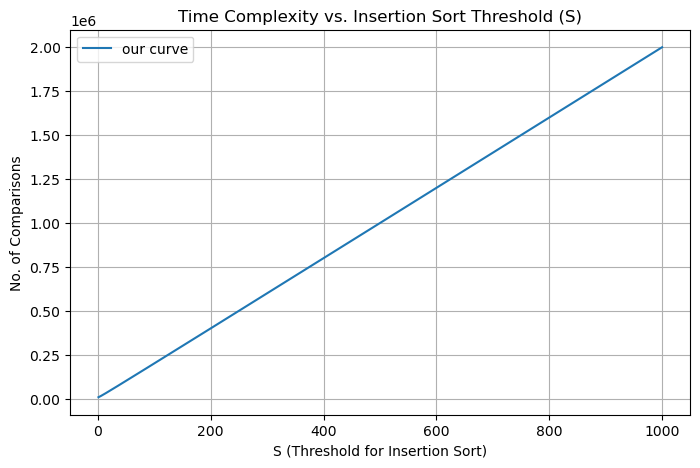

In [59]:
def equation(n, S):
    if S == 0:
        return np.nan
    return n * np.log2(n) - n * np.log2(S) + 2 * n * S + (n / 2) - (n / S) + 1

n = 1000 
S_values = np.linspace(1, n, 1000) 

plt.figure(figsize=(8, 5))

y_values = [equation(n, S) for S in S_values]  # Compute y for all S
plt.plot(S_values, y_values, label=f'our curve')

# Labels and title
plt.xlabel('S (Threshold for Insertion Sort)')
plt.ylabel('No. of Comparisons')
plt.title('Time Complexity vs. Insertion Sort Threshold (S)')
plt.legend()
plt.grid(True)
plt.show()

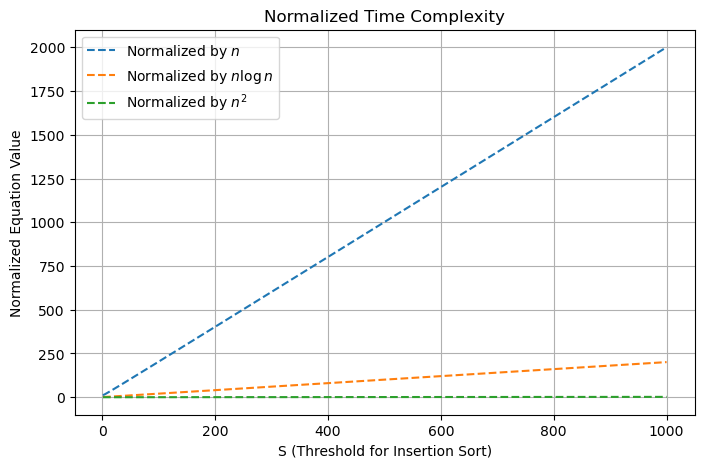

In [60]:
# Normalize the results
normalized_n = np.array(y_values) / n  # Normalize by n
normalized_nlogn = np.array(y_values) / (n * np.log2(n))  # Normalize by n log n
normalized_n_squared = np.array(y_values) / (n**2)

# Plot normalized results
plt.figure(figsize=(8, 5))
plt.plot(S_values, normalized_n, label=r'Normalized by $n$', linestyle='dashed')
plt.plot(S_values, normalized_nlogn, label=r'Normalized by $n \log n$', linestyle='dashed')
plt.plot(S_values, normalized_n_squared, label=r'Normalized by $n^2$', linestyle='dashed')

# Labels and title
plt.xlabel('S (Threshold for Insertion Sort)')
plt.ylabel('Normalized Equation Value')
plt.title('Normalized Time Complexity')
plt.legend()
plt.grid(True)
plt.show()

### (i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [20]:
# Running and retrieving data
for n in input_sizes:
    arr1 = np.random.randint(0, 10000000,n)
    arr2 = np.random.randint(0, 10000000,n)
    arr3 = np.random.randint(0, 10000000,n)
    arr4 = np.random.randint(0, 10000000,n)
    arr5 = np.random.randint(0, 10000000,n)
    
    # Hybrid Merge Sort with S=20
    comparison_count = 0
    times = []
    comparisons = []
    arr_copy1 = arr1.copy()
    arr_copy2 = arr2.copy()
    arr_copy3 = arr3.copy()
    arr_copy4 = arr4.copy()
    arr_copy5 = arr5.copy()
    
    times.append(hybrid_merge_sort(arr_copy1, 0, n-1, S=20))
    comparisons.append(comparison_count)
    comparison_count = 0
    times.append(hybrid_merge_sort(arr_copy2, 0, n-1, S=20))
    comparisons.append(comparison_count)
    comparison_count = 0
    times.append(hybrid_merge_sort(arr_copy3, 0, n-1, S=20))
    comparisons.append(comparison_count)
    comparison_count = 0
    times.append(hybrid_merge_sort(arr_copy4, 0, n-1, S=20))
    comparisons.append(comparison_count)
    comparison_count = 0
    times.append(hybrid_merge_sort(arr_copy5, 0, n-1, S=20))
    comparisons.append(comparison_count)
    comparison_count = 0
    
    comparison_data["time_taken"].append(np.mean(times))
    comparison_data["n"].append(n)
    comparison_data["S"].append(20)
    comparison_data["comparisons"].append(np.mean(comparisons))
    comparison_data["algorithm"].append("Hybrid Merge Sort")

# Save the data in a df for visualisation
df = pd.DataFrame(comparison_data)

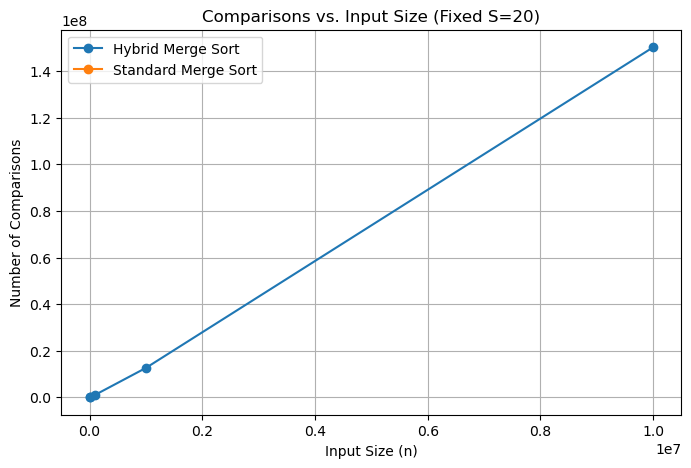

In [22]:
# Plot 1: Comparisons vs. Input Size (Fixed S)
plt.figure(figsize=(8, 5))
df_fixed_S = df[(df["S"] == 20) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"], marker='o', linestyle='-', label="Hybrid Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Comparisons")
plt.title("Comparisons vs. Input Size (Fixed S=20)")
plt.legend()
plt.grid(True)
plt.show()

From the above, it's difficult to see whether the trend follows $\mathcal{O}(n)$ or $\mathcal{O}(n \log n)$. Let's do some additional comparisons to more concretely show its time complexity. We can easily show this by normalising the data on $n$ and $n \log n$

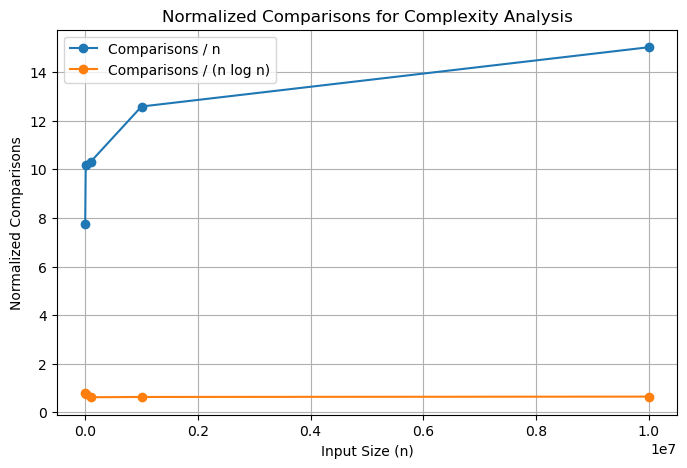

In [30]:
# Compute n log n
df_fixed_S["n_log_n"] = df_fixed_S["n"] * np.log2(df_fixed_S["n"])

# Create the first plot (linear scale)
plt.figure(figsize=(8, 5))
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"] / df_fixed_S["n"], marker='o', label="Comparisons / n")
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"] / df_fixed_S["n_log_n"], marker='o', label="Comparisons / (n log n)")
plt.xlabel("Input Size (n)")
plt.ylabel("Normalized Comparisons")
plt.title("Normalized Comparisons for Complexity Analysis (Linear Scale)")
plt.legend()
plt.grid(True)
plt.show()

# Create the second plot (logarithmic x-scale)
plt.figure(figsize=(8, 5))
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"] / df_fixed_S["n"], marker='o', label="Comparisons / n")
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"] / df_fixed_S["n_log_n"], marker='o', label="Comparisons / (n log n)")
plt.xscale("log")  # Set x-axis to logarithmic scale
plt.xlabel("Input Size (n) [Log Scale]")
plt.ylabel("Normalized Comparisons")
plt.title("Normalized Comparisons for Complexity Analysis (Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Grid for both major and minor ticks
plt.show()

As seen above, when normalised to $n\log n$, the graph shows a roughly constant value, while when normalised to $n$, the graph shows a $\log n$ graph. $\therefore$ the graph follows a $\mathcal{O}(n \log n)$ complexity, following what we derived.

### (ii) With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

In [8]:
# Test Hybrid Merge Sort with different S values (fixed n=100000)
fixed_n = 1000000
arr_fixed = np.random.randint(1, 1000000, fixed_n)
np.random.seed(10002)
comparison_data = {"n": [], "S": [], "comparisons": [], "algorithm": [], "time_taken": []}

for S in range(1,51):
    comparison_count = 0
    arr_copy = arr_fixed.copy()
    comparison_data["time_taken"].append(hybrid_merge_sort(arr_copy, 0, fixed_n - 1, S))
    comparison_data["n"].append(fixed_n)
    comparison_data["S"].append(S)
    comparison_data["comparisons"].append(comparison_count)
    comparison_data["algorithm"].append("Hybrid Merge Sort")

# Convert to DataFrame
df = pd.DataFrame(comparison_data)

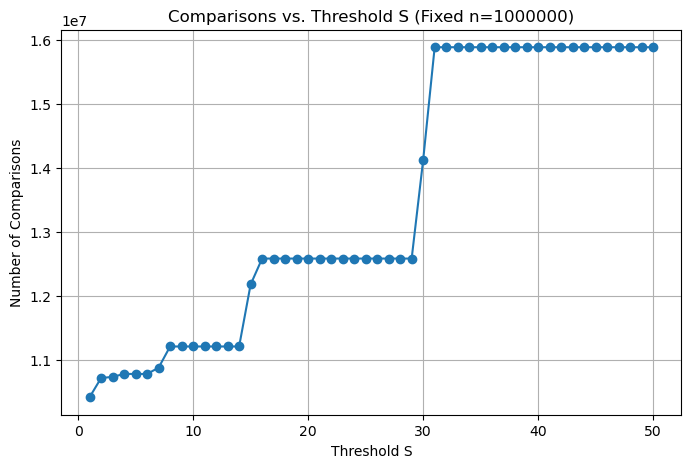

In [9]:
# Plot 2: Comparisons vs. Threshold (Fixed n)
plt.figure(figsize=(8, 5))
df_fixed_n = df[(df["n"] == fixed_n) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_n["S"], df_fixed_n["comparisons"], marker='o', linestyle='-')
plt.xlabel("Threshold S")
plt.ylabel("Number of Comparisons")
plt.title(f"Comparisons vs. Threshold S (Fixed n={fixed_n})")
plt.grid(True)
plt.show()

The above agrees with our earlier analysis of S increasing comparisons quadratically. As we can see, there are some points where the plot plateus, and this is due to the property of mergesort. (TODO: ADD EXPLANATION IN). Thus, the important point to note is the distances between each plateus, which increase quadratically. (Maybe I can add in graph to show it)

### (iii)  Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

From above, we know that the theoretical optimal value for S would be 1 (pure mergesort). However, we know that overhead from recursive function calls can greatly affect the time taken. Thus, we have chosen to check using CPU time to empirically check the optimal value for S.

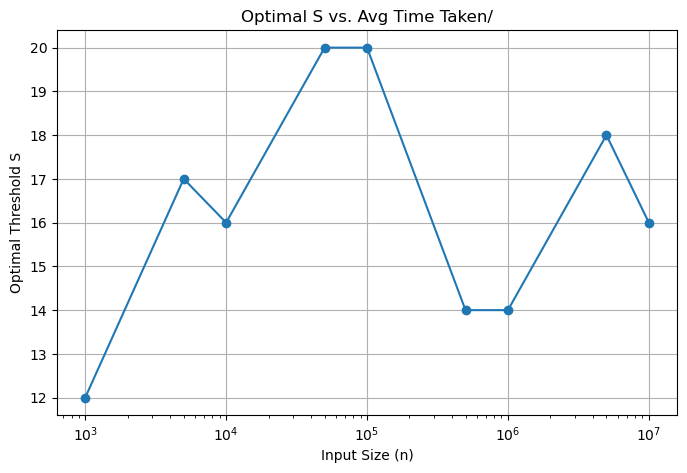

In [61]:
# Experiment setup
input_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
optimal_s_values = []
threshold_values = [i for i in range(1, 21)]
max_value = 100000
num_trials = 5

# Collect data
for n in input_sizes:
    arr_fixed1 = np.random.randint(1, max_value, n)
    arr_fixed2 = np.random.randint(1, max_value, n)
    arr_fixed3 = np.random.randint(1, max_value, n)
    arr_fixed4 = np.random.randint(1, max_value, n)
    arr_fixed5 = np.random.randint(1, max_value, n)
    comparison_data = {"S": [], "avg_time_taken": []}

    for S in threshold_values:
        times = []
        comparison_count = 0
        arr_copy1 = arr_fixed1.copy()
        arr_copy2 = arr_fixed2.copy()
        arr_copy3 = arr_fixed3.copy()
        arr_copy4 = arr_fixed4.copy()
        arr_copy5 = arr_fixed5.copy()
        times.append(hybrid_merge_sort(arr_copy1, 0, n - 1, S))
        times.append(hybrid_merge_sort(arr_copy2, 0, n - 1, S))
        times.append(hybrid_merge_sort(arr_copy3, 0, n - 1, S))
        times.append(hybrid_merge_sort(arr_copy4, 0, n - 1, S))
        times.append(hybrid_merge_sort(arr_copy5, 0, n - 1, S))
        comparison_data["avg_time_taken"].append(np.mean(times))
        comparison_data["S"].append(S)

    df_s = pd.DataFrame(comparison_data)
    optimal_S = df_s.loc[df_s["avg_time_taken"].idxmin(), "S"]
    optimal_s_values.append(optimal_S)

# Plot Optimal S vs Input Size
plt.figure(figsize=(8, 5))
plt.plot(input_sizes, optimal_s_values, marker='o', linestyle='-')
plt.xlabel("Input Size (n)")
plt.ylabel("Optimal Threshold S")
plt.title("Optimal S vs. Avg Time Taken/")

# Since the input values scale exponentially, we use a log scale for easier visualisation
plt.xscale("log")
plt.grid(True)
plt.show()

In [62]:
print(np.array([optimal_s_values]).mean())

16.333333333333332


From the above, we can conclude that on average, 16 should be the optimal S value

## (d) Compare with original Mergesort: 
### Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [28]:
# General setup
n = 10000000
arr = np.random.randint(0, 10000000,n)

In [29]:
# Comparison in terms of key comparisons
comparison_count = 0
arr_copy = arr.copy()
mergesort_time = standard_merge_sort(arr_copy, 0, n-1)
mergesort_comparisons = comparison_count

comparison_count = 0
arr_copy = arr.copy()
hybridsort_time = hybrid_merge_sort(arr_copy, 0, n-1, S=16)
hybridsort_comparisons = comparison_count

print(f"Mergesort Key Comparisons: {mergesort_comparisons} comparisons")
print(f"Hybridsort Key Comparisons: {hybridsort_comparisons} comparisons")
print(f"Mergesort Time taken: {mergesort_time}s")
print(f"Hybridsort Time Taken: {hybridsort_time}s")

Mergesort Key Comparisons: 121485124 comparisons
Hybridsort Key Comparisons: 131735814 comparisons
Mergesort Time taken: 39.84903812408447s
Hybridsort Time Taken: 34.51628279685974s


From the above it seems that our initial hypothesis is correct. While mergesort has less comparisons than the hybrid sort, the time saved from avoiding large recursive overheads makes the hybridsort method more efficient in practice, despite the theory disagreeing. 

# Appendix A: Derivation of Theoretically optimal value for S for runtime time complexity, in the average case
### *Not done fully, I realised there's a small error in the mergesort eqn but will finish up soon

## Time Complexity of Hybrid Sort

### Given:
- **Insertion Sort Complexity:**  
  $
  I(n) = \alpha \left(\frac{n^2 + n - 2}{4} \right)
  $
- **Merge Sort Complexity:**  
  $
  M(n) = \mathcal{B} \left( n \log_2 n - (n - 1) \right) = O(n \log_2 n)
  $
  <br>
  <br>
- **Hybrid Sort Complexity:** $T(n)$

### Assumptions:
$
n = 2^k, \quad s = 2^{k'}, \quad k, k' \in \mathbb{N}
$

(TO ADD IN MORE)

### Hybrid Sort Recursive Tree:
```
         Hybrid Sort
            T(n)
          /      \
      T(n/2)    T(n/2)
      /   \      /   \
 T(n/4) T(n/4) T(n/4) T(n/4)
…       …       …       …
T(S)    T(S)    T(S)    T(S)
```
**Width of the tree:**  n/S

### Time Complexity Calculations:

#### **Time taken for merge sort**
$$
M(n) = \mathcal{B} \left[ n \log_2 n - (n - 1) \right] - \frac{n}{S} M(S)
$$

$$
= \mathcal{B} \left[ n \log_2
n - (n -1) \right] -  \left(\frac{n}{S}\right) \cdot \mathcal{B} \left[ S \log_2 S - (S - 1) \right]
$$

#### **Time taken for insertion sort**
$$
I(n) = 2 \log_2 \left(\frac{n}{S}\right) I(S)
$$

$$
= 2 \log_2 \left(\frac{n}{S}\right) \cdot \alpha \left(\frac{S^2 + S - 2}{4}\right)
$$

### **Final Complexity Expression:**
$$
\therefore T(n) = \left(\frac{n}{S}\right) 
\left[\alpha \left(\frac{S^2 + S - 2}{4} \right) - \mathcal{B} \left(S \log_2 S - S + 1\right)\right] 
+ \mathcal{B} \left[n \log_2 n - (n - 1) \right]
$$

It looks like from above, we need to try and figure out what the values of $\alpha$ and $\mathcal{B}$ are. Be mindful that these values are hardware-specific, so my outputs here may not be the same as the outputs that you will have. The optimal S values would also be hardware-specific, although it should all be roughly in the same range of roughly [8, 20]. Let's do some regression to obtain the best-fit values of $\alpha$ and $\mathcal{B}$

Starting experiments... (this may take a while)


Testing n values: 100%|█████████████████████| 9991/9991 [54:44<00:00,  3.04it/s]


Estimated α (insertion sort): 5.29e-08
Estimated β (merge sort): 1.45e-07


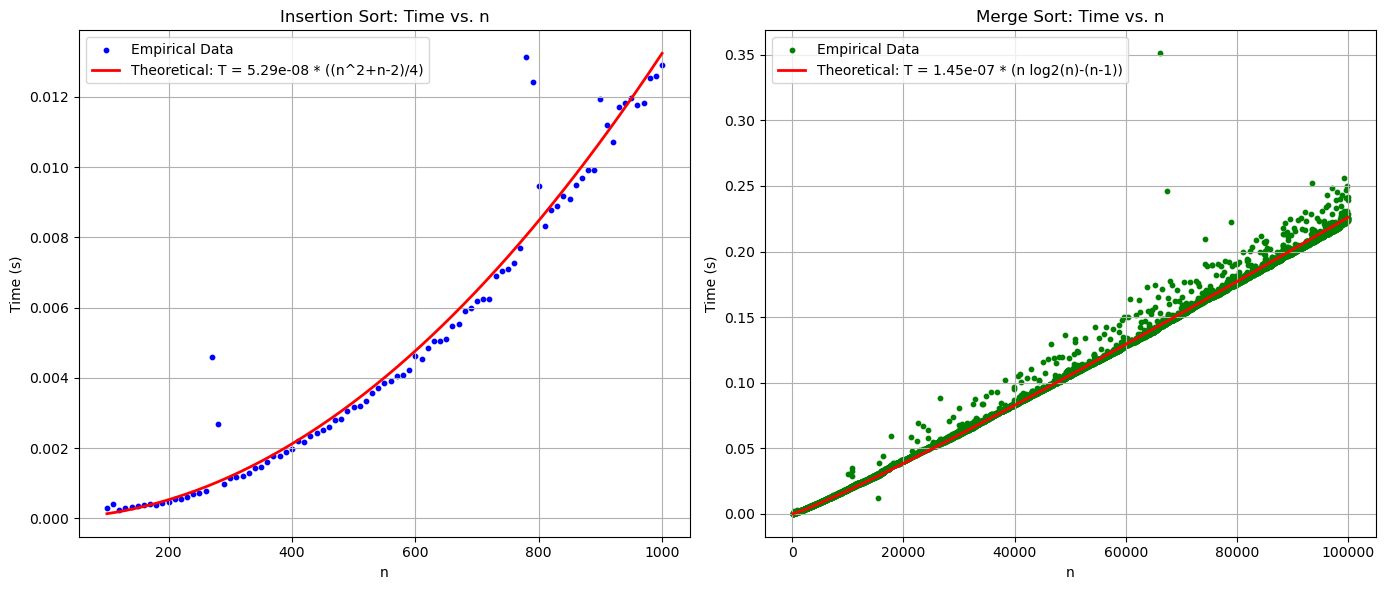

In [34]:
from tqdm import tqdm

# Number of runs per n value
trials = 3

# Create n values from 1,000 to 1,000,000, increasing by 10
n_values = np.arange(100, 100001, 10)

# Lists to store empirical times:
# For insertion sort, we only record times for n <= 1000, since the O(n^2) complexity would explode
insertion_results = []  
merge_results = []  

print("Starting experiments... (this may take a while)")

for n in tqdm(n_values, desc="Testing n values"):
    # Insertion Sort
    if n <= 1000:
        total_time = 0
        for _ in range(trials):
            # Generate array using np.random.randint and convert to list
            arr = np.random.randint(0, n+1, size=n).tolist()
            total_time += insertion_sort(arr.copy(), 0, n - 1)
        avg_time = total_time / trials
        insertion_results.append((n, avg_time))
    
    # Merge Sort (for all n)
    total_time = 0
    for _ in range(trials):
        arr = np.random.randint(0, n+1, size=n).tolist()
        total_time += standard_merge_sort(arr.copy(), 0, n - 1)
    avg_time = total_time / trials
    merge_results.append((n, avg_time))
    
# Convert into numpy arrays
if insertion_results:
    ins_n = np.array([item[0] for item in insertion_results])
    ins_time = np.array([item[1] for item in insertion_results])
else:
    ins_n, ins_time = np.array([]), np.array([])

mer_n = np.array([item[0] for item in merge_results])
mer_time = np.array([item[1] for item in merge_results])

# Regression Analysis
# Insertion Sort
if ins_n.size > 0:
    X_insertion = (ins_n**2 + ins_n - 2) / 4.0
    alpha_est = np.sum(X_insertion * ins_time) / np.sum(X_insertion**2)
    print(f"Estimated α (insertion sort): {alpha_est:.2e}")
else:
    alpha_est = None

# Merge Sort
X_merge = mer_n * np.log2(mer_n) - (mer_n - 1)
beta_est = np.sum(X_merge * mer_time) / np.sum(X_merge**2)
print(f"Estimated β (merge sort): {beta_est:.2e}")

# Plotting empirical and theoretical curves
plt.figure(figsize=(14, 6))

# Insertion Sort Plot
if ins_n.size > 0:
    plt.subplot(1, 2, 1)
    plt.scatter(ins_n, ins_time, s=10, color='blue', label='Empirical Data')
    
    # Generate theoretical curve using estimated α
    n_theo = np.linspace(ins_n.min(), ins_n.max(), 200)
    theo_insertion = alpha_est * ((n_theo**2 + n_theo - 2) / 4.0)
    plt.plot(n_theo, theo_insertion, color='red', linewidth=2, label=f'Theoretical: T = {alpha_est:.2e} * ((n^2+n-2)/4)')
    plt.xlabel('n')
    plt.ylabel('Time (s)')
    plt.title('Insertion Sort: Time vs. n')
    plt.legend()
    plt.grid(True)

# Merge Sort Plot
plt.subplot(1, 2, 2)
plt.scatter(mer_n, mer_time, s=10, color='green', label='Empirical Data')

# Generate theoretical curve using estimated β
n_theo = np.linspace(mer_n.min(), mer_n.max(), 200)
theo_merge = beta_est * (n_theo * np.log2(n_theo) - (n_theo - 1))
plt.plot(n_theo, theo_merge, color='red', linewidth=2, label=f'Theoretical: T = {beta_est:.2e} * (n log2(n)-(n-1))')
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.title('Merge Sort: Time vs. n')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Looks like some outlier data is affecting our best-fit line. Let's remove them and get a value of $\alpha$ and $\mathcal{B}$, using a two-pass outlier removal method

Insertion Sort (raw)   alpha = 5.29e-08
Insertion Sort (clean) alpha = 5.13e-08
Merge Sort   (raw)   beta = 1.45e-07
Merge Sort   (clean) beta = 1.44e-07


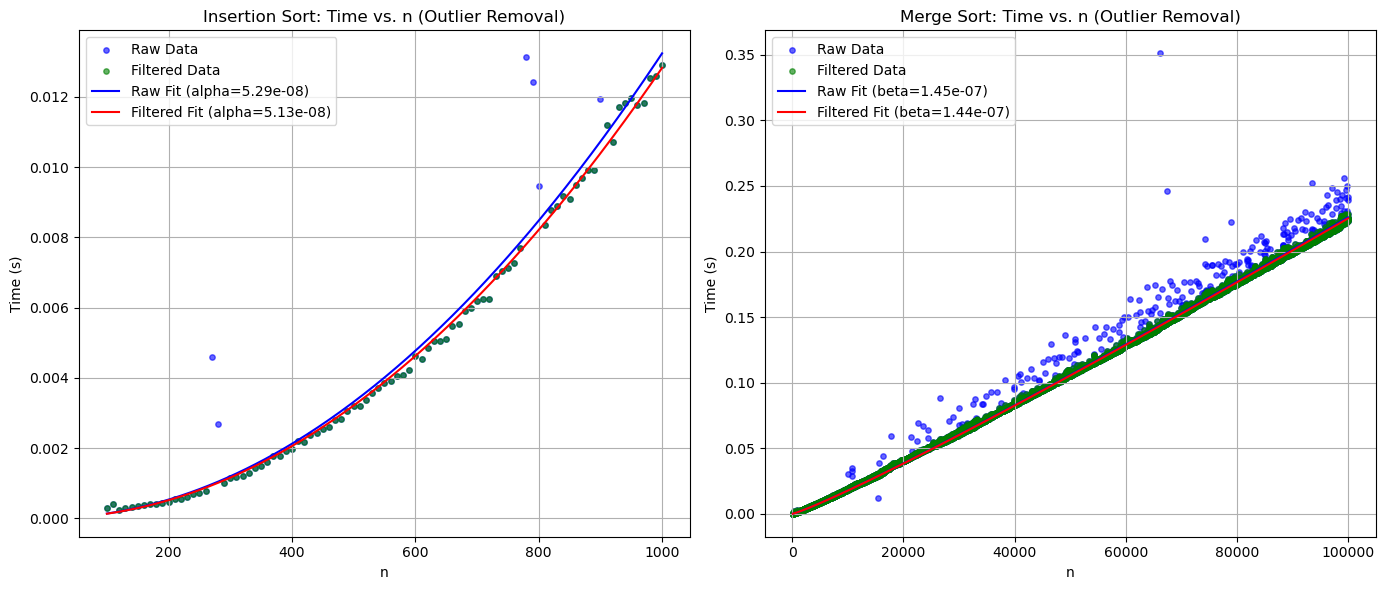

In [43]:
def no_intercept_regression(X, Y):
    return np.sum(X * Y) / np.sum(X**2)

def remove_outliers(X, Y, alpha, threshold=1):
    Y_pred = alpha * X
    residuals = Y - Y_pred
    std_res = np.std(residuals)
    keep_mask = np.abs(residuals) < threshold * std_res
    return keep_mask

# 2) Outlier removal for Insertion Sort
if ins_n.size > 0:
    X_insertion_raw = (ins_n**2 + ins_n - 2) / 4.0
    Y_insertion_raw = ins_time
    
    # First-pass regression
    alpha_init = no_intercept_regression(X_insertion_raw, Y_insertion_raw)
    
    # Identify outliers
    mask_insertion = remove_outliers(X_insertion_raw, Y_insertion_raw, alpha_init, threshold=1)
    
    # Filtered data
    ins_n_filt = ins_n[mask_insertion]
    ins_time_filt = ins_time[mask_insertion]
    
    # We also need the filtered X values for the second-pass regression
    X_insertion_filt = (ins_n_filt**2 + ins_n_filt - 2) / 4.0
    alpha_filt = no_intercept_regression(X_insertion_filt, ins_time_filt)
    
    print(f"Insertion Sort (raw)   alpha = {alpha_init:.2e}")
    print(f"Insertion Sort (clean) alpha = {alpha_filt:.2e}")
else:
    alpha_init = alpha_filt = None
    ins_n_filt = np.array([])
    ins_time_filt = np.array([])

# 3) Outlier removal for Merge Sort
X_merge_raw = mer_n * np.log2(mer_n) - (mer_n - 1)
Y_merge_raw = mer_time

# First-pass regression
beta_init = no_intercept_regression(X_merge_raw, Y_merge_raw)

# Identify outliers
mask_merge = remove_outliers(X_merge_raw, Y_merge_raw, beta_init, threshold=1.5)

# Filtered data (time vs. n)
mer_n_filt = mer_n[mask_merge]
mer_time_filt = mer_time[mask_merge]

# Filtered X for second-pass regression
X_merge_filt = mer_n_filt * np.log2(mer_n_filt) - (mer_n_filt - 1)
beta_filt = no_intercept_regression(X_merge_filt, mer_time_filt)

print(f"Merge Sort   (raw)   beta = {beta_init:.2e}")
print(f"Merge Sort   (clean) beta = {beta_filt:.2e}")

# 4) Plotting 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Insertion Sort
if ins_n.size > 0:
    ax = axes[0]
    ax.scatter(ins_n, ins_time, s=15, alpha=0.6, color='blue', label='Raw Data')
    ax.scatter(ins_n_filt, ins_time_filt, s=15, alpha=0.6, color='green', label='Filtered Data')

    n_line = np.linspace(ins_n.min(), ins_n.max(), 300)
    
    T_line_raw = alpha_init * ((n_line**2 + n_line - 2)/4.0)
    ax.plot(n_line, T_line_raw, color='blue', 
            label=f'Raw Fit (alpha={alpha_init:.2e})')
    
    # Filtered model
    T_line_filt = alpha_filt * ((n_line**2 + n_line - 2)/4.0)
    ax.plot(n_line, T_line_filt, color='red', 
            label=f'Filtered Fit (alpha={alpha_filt:.2e})')
    
    ax.set_xlabel('n')
    ax.set_ylabel('Time (s)')
    ax.set_title('Insertion Sort: Time vs. n (Outlier Removal)')
    ax.legend()
    ax.grid(True)
else:
    axes[0].set_visible(False)

# Merge Sort
ax = axes[1]
ax.scatter(mer_n, mer_time, s=15, alpha=0.6, color='blue', label='Raw Data')
ax.scatter(mer_n_filt, mer_time_filt, s=15, alpha=0.6, color='green', label='Filtered Data')
n_line = np.linspace(mer_n.min(), mer_n.max(), 300)

# Raw model
T_line_raw = beta_init * (n_line * np.log2(n_line) - (n_line - 1))
ax.plot(n_line, T_line_raw, color='blue', 
        label=f'Raw Fit (beta={beta_init:.2e})')

# Filtered model
T_line_filt = beta_filt * (n_line * np.log2(n_line) - (n_line - 1))
ax.plot(n_line, T_line_filt, color='red', 
        label=f'Filtered Fit (beta={beta_filt:.2e})')

ax.set_xlabel('n')
ax.set_ylabel('Time (s)')
ax.set_title('Merge Sort: Time vs. n (Outlier Removal)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

From above, we can conclude $\alpha = 5.13\times10^{-8}$ and $\mathcal{B} = 1.44\times10^{-7}$, at least for my macbook. Great! All we need to do now is substitute this value into the equation, differentiate and verify the local minima. Howeever, the equation is very very complicated as we can see. To save time and sanity, let's just make use of the scipy.optimize.minimize() function.

In [ ]:
import scipy

def get_optimal_S_value(n, alpha, beta): 
    # I realised I plugged in the wrong equation for average complexity of merge sort, will fix later
    def T(S):
        return np.log2(...)
    S0 = 12 # Rough guess of the optimal value based on the experimental results
    result = scipy.optimize.minimize(T, S0)
    S_min = result[0]
    print(The optimal value for n = {n} is {S_min}
          
for n in [1000, 5000, 10000, 50000,100000,500000,1000000,5000000,10000000]:
    get_optimal_S_value(n, 5.13e-08, 1.44e-07)
    